## First step to clean the dataset:

- Select only English movies
- Select onlu full-length feature (movies of more than one hour long)
- Remove movies for which we don't have the title

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import numpy as np
import string
import json

In [50]:
character_metadata = pd.read_csv('Data/character.metadata.tsv', sep='\t', names = ['Wikipedia_movie_ID',
                                                                              'Freebase_movie_ID',
                                                                              'Movie_release_date',
                                                                              'Character_name',
                                                                              'Actor_date_of_birth',
                                                                              'Actor_gender',
                                                                              'Actor_height',
                                                                              'Actor_ethnicity',
                                                                              'Actor_name',
                                                                              'Actor_age_at_movie_release',
                                                                              'Freebase_character/actor_map_ID',
                                                                              'Freebase_character_ID',
                                                                              'Freebase_actor_ID'])

movie_metadata = pd.read_csv('Data/movie.metadata.tsv', sep='\t', names = ['Wikipedia_movie_ID',
                                                                              'Freebase_movie_ID',
                                                                              'Movie_name',
                                                                              'Movie_release_date',
                                                                              'Movie_box_office_revenue',
                                                                              'Movie_runtime',
                                                                              'Movie_languages',
                                                                              'Movie_countries',
                                                                              'Movie_genres'])

plot_summaries = pd.read_csv('Data/plot_summaries.txt', sep='\t', names = ['Wikipedia_movie_ID',
                                                                              'summary'])

In [3]:
#Copy of movie_metadata dataset
movie_metadata_readable = movie_metadata.copy(deep= True)

# Make the colomn Movie_languages, Movie_countries and Movie_genres more readable

def readable(colomn):

    pd.set_option('mode.chained_assignment', None) #remove warning

    for i in colomn.index:
        d=json.loads(colomn[i]) #change set of each row from the colomn to dict
        colomn[i]=list(d.values()) #change the dict into list

readable(movie_metadata_readable['Movie_languages'])
readable(movie_metadata_readable['Movie_countries'])
readable(movie_metadata_readable['Movie_genres'])

movie_metadata_readable.head()

KeyboardInterrupt: 

In [ ]:
#Filtering of movie_metada, keeping only full-length features movies (more than 60 minutes long), in English and with that have a Title in the database.
movie_metadata_filtered = movie_metadata_readable.copy(deep=True)
movie_metadata_filtered_language_unfiltered = movie_metadata_filtered.copy(deep=True)
movie_metadata_filtered = movie_metadata_filtered[movie_metadata_filtered.Movie_languages.map(set(['English Language']).issubset)]

movie_metadata_filtered.dropna(subset=['Movie_name'],inplace=True)

movie_metadata_filtered = movie_metadata_filtered[movie_metadata_filtered.Movie_runtime >= 60]

movie_metadata_filtered.dropna(subset=['Movie_release_date'], inplace = True)
movie_metadata_filtered["Movie_release_date"] = movie_metadata_filtered['Movie_release_date'].apply(lambda x : str(x)[:4]).apply(lambda x : int(x))
movie_metadata_filtered_date_unfiltered = movie_metadata_filtered.copy(deep=True)

movie_metadata_filtered = movie_metadata_filtered[movie_metadata_filtered.Movie_release_date <= 2012]


movie_English_first = movie_metadata_filtered[movie_metadata_filtered.Movie_languages.str[0]=="English Language"] #English Language as First Language

movie_English_only = movie_metadata_filtered[movie_metadata_filtered.Movie_languages.map(set(['English Language']).issuperset)] #Only English Language


(array([ 632.,  630.,  718.,  750.,  817.,  957., 1158., 1131., 1030.,
         960.,  761.,  630.,  315.,   16.]),
 array([2000.        , 2000.92857143, 2001.85714286, 2002.78571429,
        2003.71428571, 2004.64285714, 2005.57142857, 2006.5       ,
        2007.42857143, 2008.35714286, 2009.28571429, 2010.21428571,
        2011.14285714, 2012.07142857, 2013.        ]),
 <BarContainer object of 14 artists>)

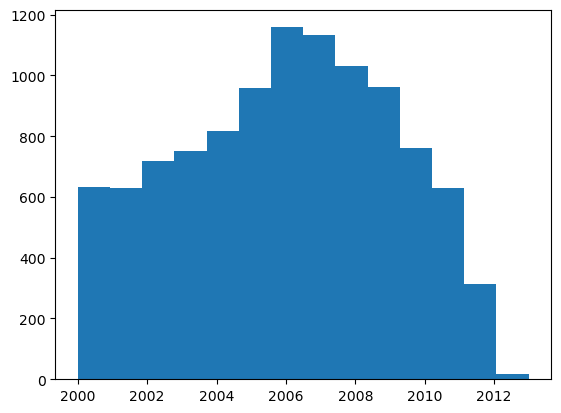

In [ ]:
#Number of movies per year (2000-2016)
plt.hist(movie_metadata_filtered_date_unfiltered.Movie_release_date[movie_metadata_filtered_date_unfiltered.Movie_release_date > 1999],bins=14)

#les films après 2013 ont déjà été retiré par les précédents filtres, mieux vaut laisser comme ça ou refaire le graph au départ avec tous les films ?

/opt/jlab-env/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 66582 (\N{DESERET CAPITAL LETTER JEE}) missing from current font.
  func(*args, **kwargs)
/opt/jlab-env/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 66610 (\N{DESERET SMALL LETTER SHORT O}) missing from current font.
  func(*args, **kwargs)
/opt/jlab-env/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 66633 (\N{DESERET SMALL LETTER ER}) missing from current font.
  func(*args, **kwargs)
/opt/jlab-env/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 66635 (\N{DESERET SMALL LETTER EM}) missing from current font.
  func(*args, **kwargs)
/opt/jlab-env/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 66636 (\N{DESERET SMALL LETTER EN}) missing from current font.
  func(*args, **kwargs)
/opt/jlab-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 66582 (\N{DESERET 

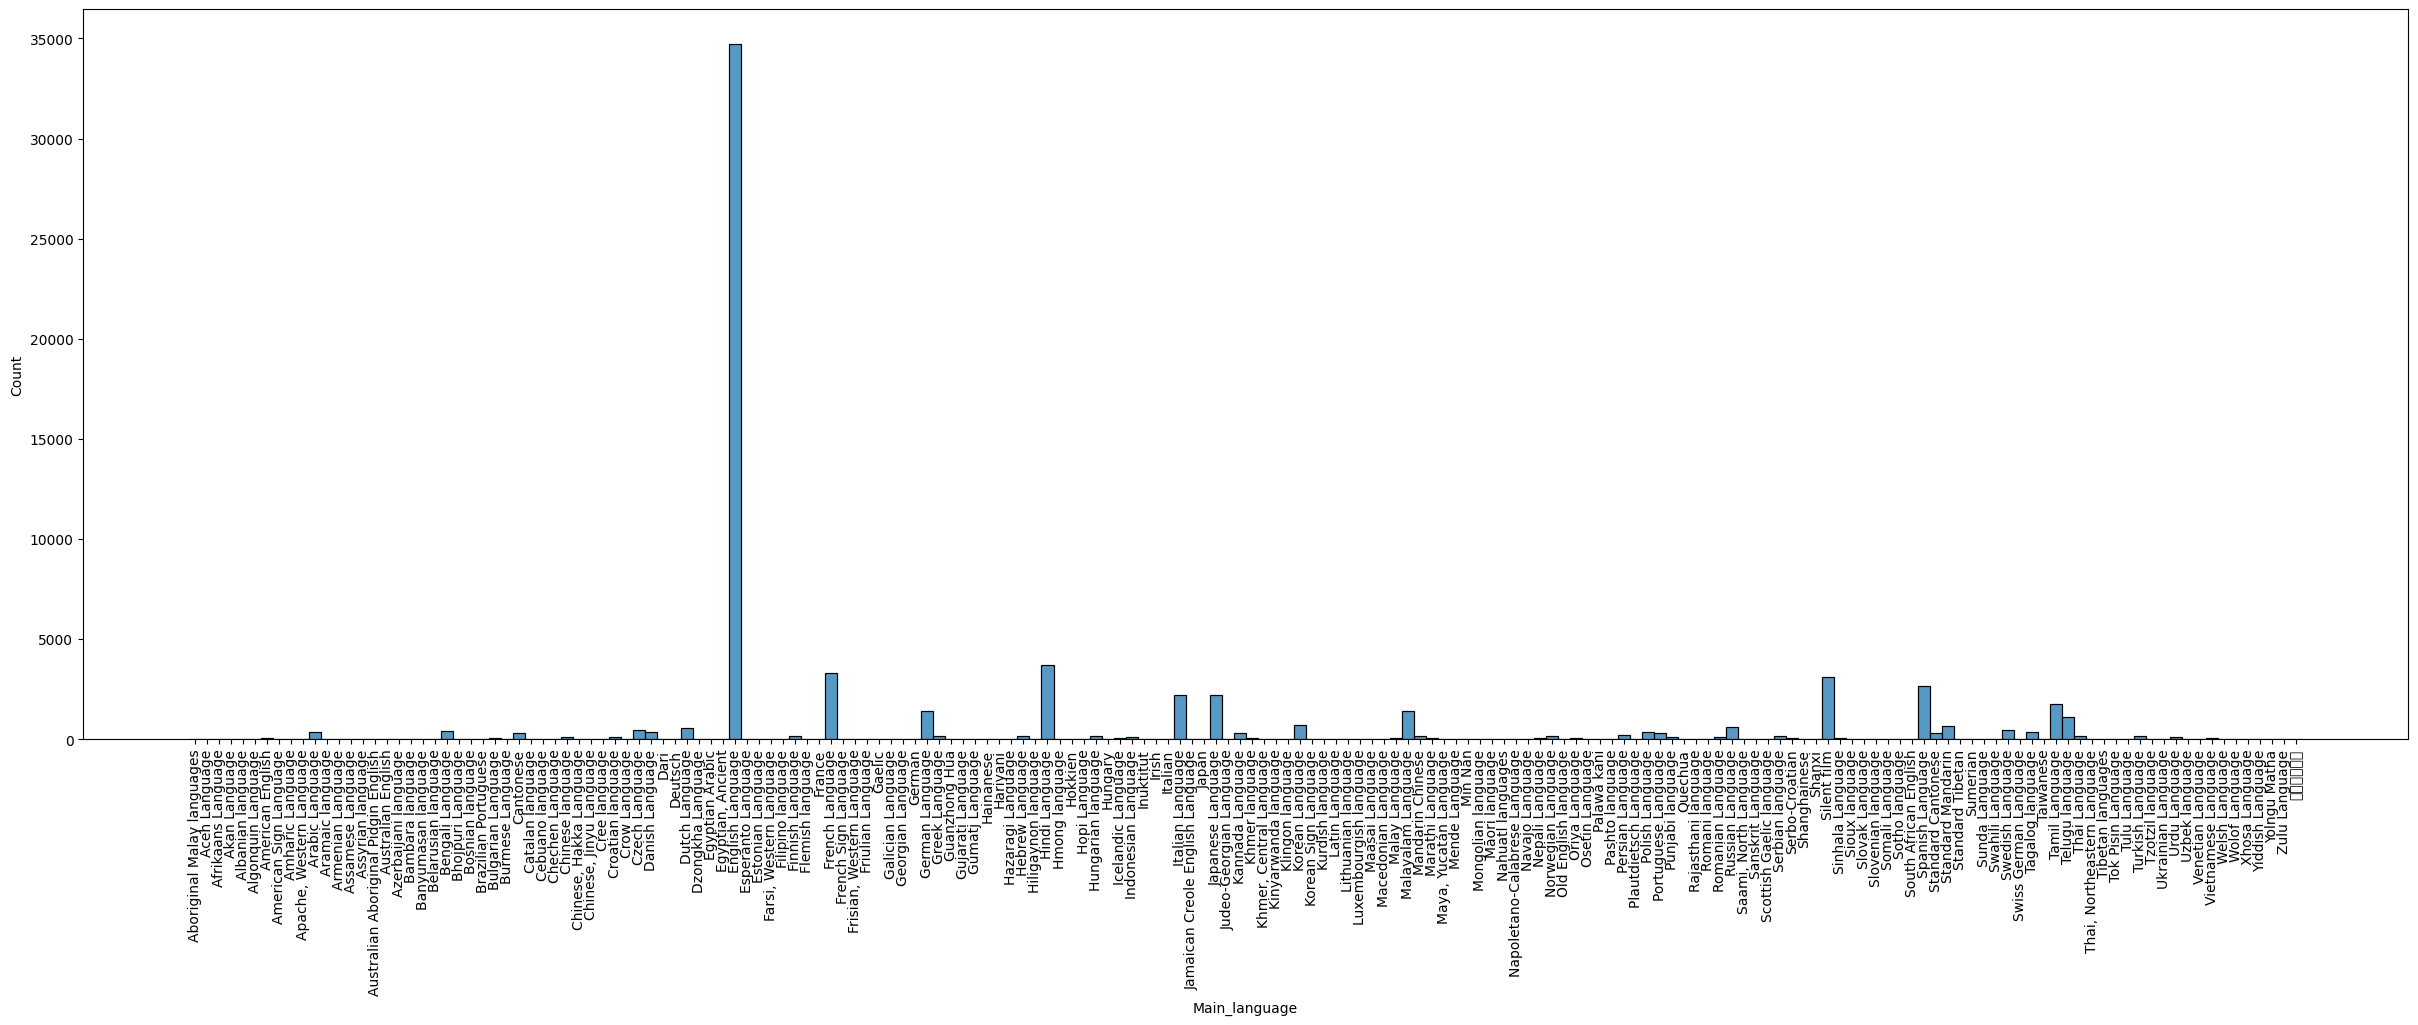

In [ ]:
#Movie distribution per languages'
movie_metadata_filtered_language_unfiltered['Main_language'] = movie_metadata_filtered_language_unfiltered.Movie_languages.str[0]
movie_metadata_filtered_language_unfiltered['Main_language'] = movie_metadata_filtered_language_unfiltered.Main_language.astype('category')

plt.figure(figsize=(30,10))
plt.rc('axes', unicode_minus=False)
ax = sns.histplot(movie_metadata_filtered_language_unfiltered,x='Main_language',stat='count')
#ax.set_xticklabels(rotation=90,labels = movie_metadata_filtered_language_unfiltered['Main_language'].cat.categories)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.gcf().subplots_adjust(bottom=0.15)

#C'est dégueu et j'arrive pas à rendre ça propre...
##Les mesages d'erreur c'est parce qu'il arrive pas à afficher les caracttères non latin, j'ai essayé de m'en débarasser mais j'ai pas réussi

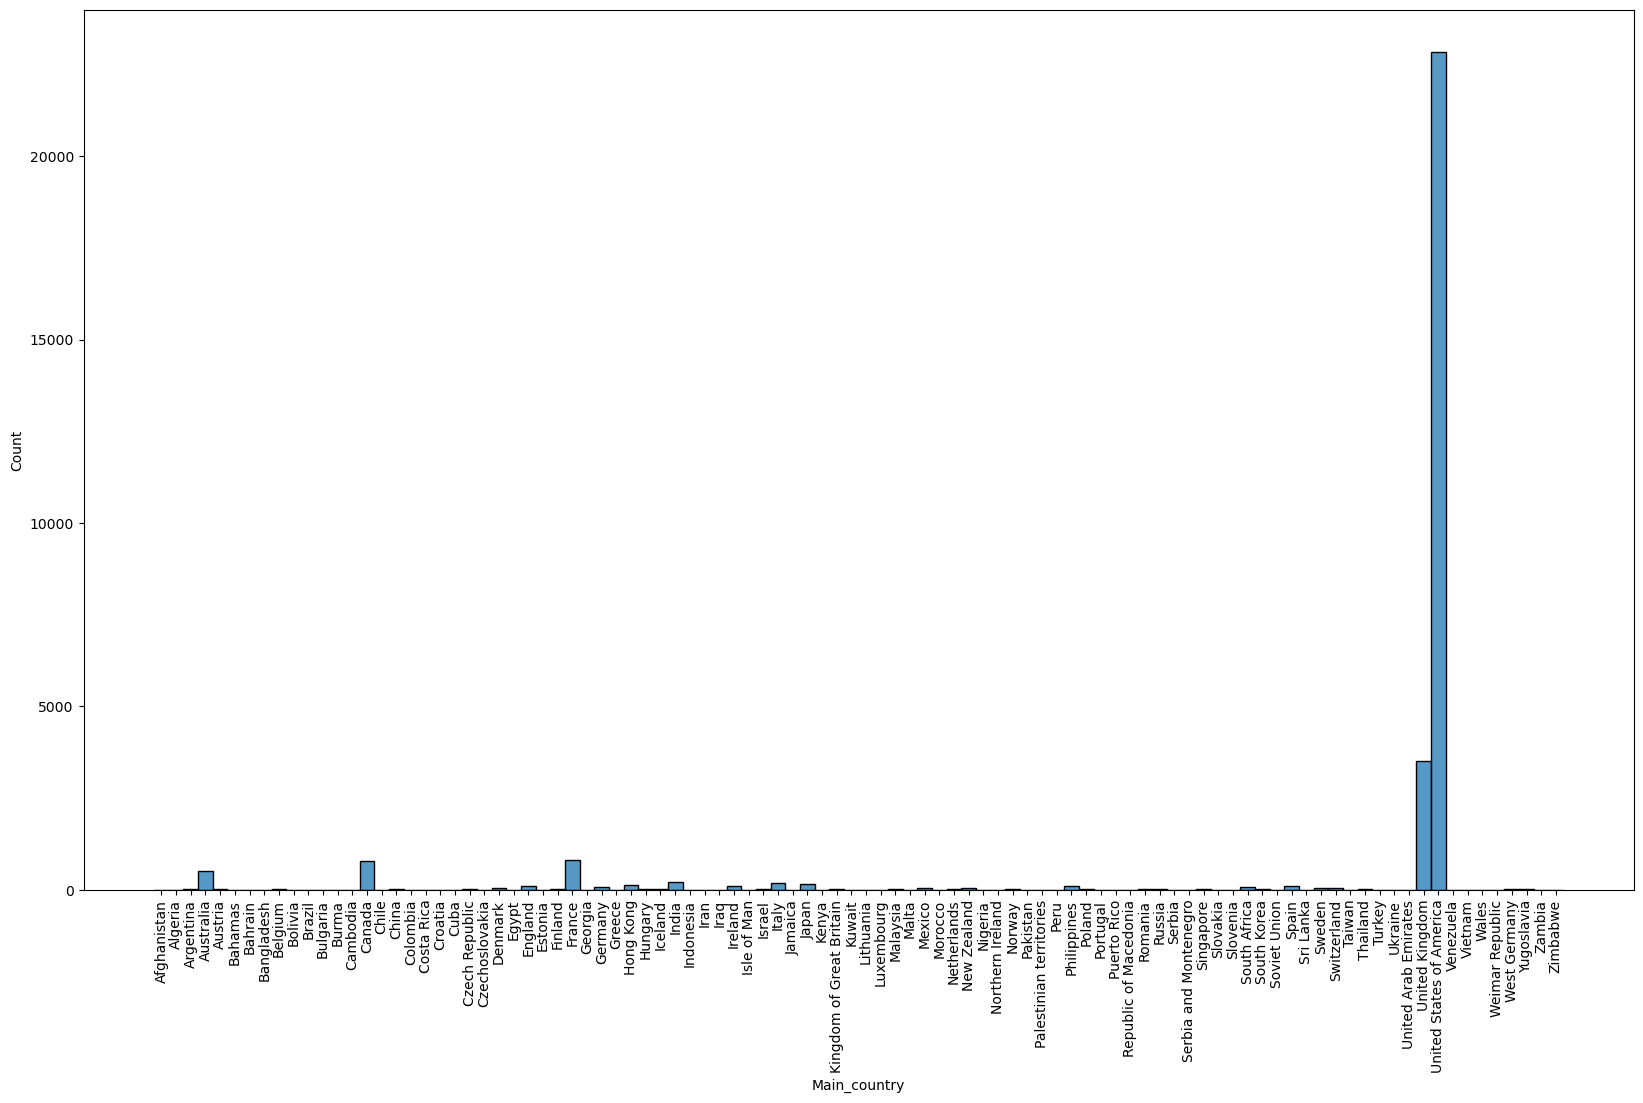

In [ ]:
#Movie distribution per country of production (after filtering)
movie_metadata_filtered['Main_country'] = movie_metadata_filtered.Movie_countries.str[0]
movie_metadata_filtered['Main_country'] = movie_metadata_filtered.Main_country.astype('category')

plt.figure(figsize=(20,10))
ax = sns.histplot(movie_metadata_filtered,x='Main_country',stat='count')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.gcf().subplots_adjust(bottom=0.0)

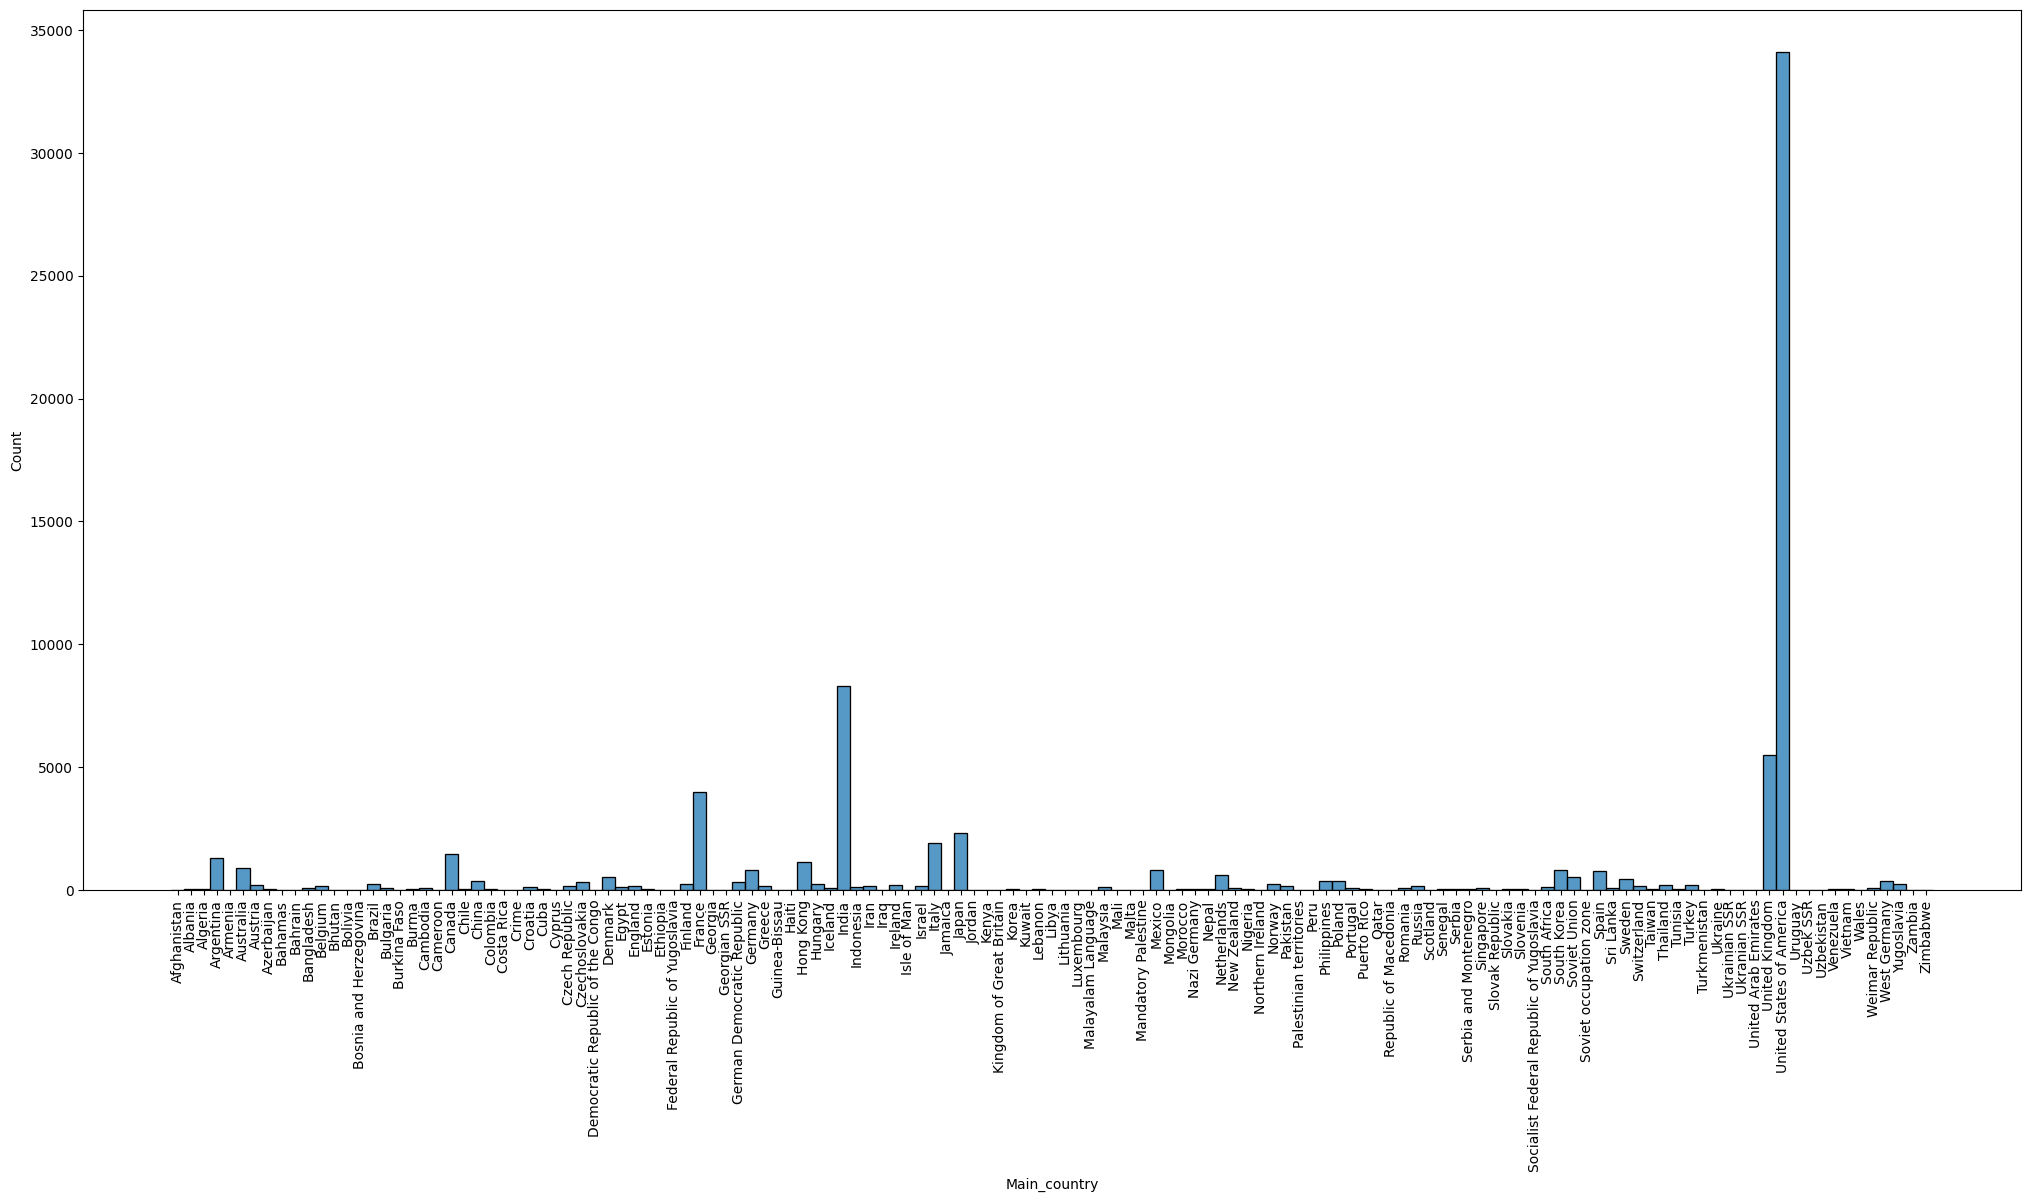

In [ ]:
#Movie distribution per country of production (before filtering)
movie_metadata_filtered_language_unfiltered['Main_country'] = movie_metadata_filtered_language_unfiltered.Movie_countries.str[0]
movie_metadata_filtered_language_unfiltered['Main_country'] = movie_metadata_filtered_language_unfiltered.Main_country.astype('category')

plt.figure(figsize=(25,10))
ax = sns.histplot(movie_metadata_filtered_language_unfiltered,x='Main_country',stat='count')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.gcf().subplots_adjust(bottom=0.0)

In [9]:
movie_English_only.to_csv(path_or_buf = "Data/movies_metadata_english_only.csv", sep=',')

NameError: name 'movie_English_only' is not defined

movie_metadata_filtered_language_unfiltered

In [8]:
# IMDB files 

ratings_imdb = pd.read_table('Data/ratings_imdb.tsv', sep="\t")
ratings_imdb.head()


movies_imdb= pd.read_table('Data/movies_imdb.tsv', sep="\t")
movies_imdb.head()



<!DOCTYPE html><html><head><meta name="google" content="notranslate"><meta http-equiv="X-UA-Compatible" content="IE=edge;"><style nonce="pufYrKhNDJJqqAG-SFT7Wg">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name="referrer" content="origin"><title>movies_imdb.tsv - Google Drive</title><meta property="og:title" content="movies_imdb.tsv"><meta property="og:type" content="article"><meta property="og:site_name" content="Google Docs"><meta property="og:url" content="https://drive.google.com/file/d/1iF2uzRW61_FrESQ-wt25tWwC69QRQRWH/view?usp=share_link&amp;usp=embed_facebook"><link rel="shortcut icon" href="https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png"><link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Google+Sans:300,400,500,700" nonce="pufYrKhNDJJqqAG-SFT7Wg"><link rel="stylesheet" href="https://www.gstatic.com/_/apps-fileview/_/ss/k=apps-fileview.v.pS9qO3S7_i8.L.W.O/am=IAw/d=0/rs=AO0039tKc00nUh0arlFXLlNzJwi36gJgQQ" nonce="pufYrKhNDJJqqAG-SFT7Wg"><script nonce="dlpJ4P03a7d5BQdmYvRibQ">_docs_flag_initialData={"docs-ails":"docs_cold","docs-fwds":"docs_sdf","docs-crs":"docs_crs_nl","docs-fe-re":2,"docs-fl":1,"docs-l1lc":4,"docs-l1lm":"ZRH","docs-l2lc":4,"docs-l2lm":"GRQ","docs-l2t":0,"docs-lsd":3,"docs-orl":1,"docs-shdn":0,"docs-tfh":"","docs-eett":true,"info_params":{},"docs-earwdm":false,"docs-ebuwdwm":false,"docs-ecsdwm":false,"docs-edceidwm":false,"docs-eecdwm":false,"docs-eecpdm":false,"docs-easdwm":false,"docs-eadwm":false,"docs-eaodwm":true,"docs-easedm":true,"docs-eapdwm":false,"docs-bbmdwm":true,"docs-ecddwm":false,"docs-ecsdw":false,"docs-edatadm":false,"docs-edwewm":false,"docs-eedwdwm":false,"docs-eedawm":false,"docs-efewdm":false,"docs-efwm":false,"docs-egfdwm":false,"docs-ehldrdm":true,"docs-eidw":false,"docs-emhdwm":true,"docs-empdwm":true,"docs-enpdwm":false,"docs-wiz-endm":false,"docs-eppdm":false,"docs-wiz-epdwm":false,"docs-epdwm":false,"docs-eridwm":true,"docs-erddm":false,"docs-erdwm":true,"docs-edsedw":false,"docs-esdodwm":false,"docs-esidm":false,"docs-esfdm":true,"docs-euddwm":false,"docs-eedm":true,"docs-eipdwm":false,"docs-eoiidwm":false,"docs-eubcdwm":false,"docs-erfdwm":false,"docs-cpm":false,"docs-cpr":false,"docos-edutfr":false,"uls":"","customer_type":"ND","docs-obsImUrl":"https://ssl.gstatic.com/docs/common/netcheck.gif","docs-ecuach":false,"docs-ecci":false,"docs-esi":false,"docs-cei":{"i":[70983243,50492410,50127660,49700098,49451659,71321762,71185138,71290182,49979626,49816025,50580192,5796211,5714051,50082848,5712270,71529430,71314999,71530191,71401173,50285445,50606495,50495792,49453005,71330661,48966262,49517626,50347682,71402445,50335937,5711538,49453894,50167079,71079012,71603192,49823132,49472091,49765402,5746992,49375342,49623141,49924734,50291140,49824083,5771837,71239074,71382526,50529271,71240933,5732271,5779500,5704695,71038182,5712639,50322383,50273576,71152193,71119946,49643963,71054470,5712647,49613648,49372463,50359988,50505315,50513182,5747066,50594504,50468041,49622751,49376021,5771857,71102112,49822889,5744348,71396833,50218262,5748810,50204463,5737800,71537746,50221868,70977068,71273697,5742841,49378909,50238801,49376357,50168335,50520367,49624200,5704745,71197914,50360884,49842923,71035328,5792878,71480204,5

In [ ]:
# Rotten tomatoes 

rotten_tomatoes = pd.read_table('Data/movies_rottentomatoes.csv', sep=",")
rotten_tomatoes.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [ ]:
# Genre processing: give only one genre to our films, preferably the main genre (first on the list), from a "basic" dictionnary of genre


# 1st step: create a new genre dictionnary
dict_genre = {
    "Action": ["Action/adventure", "ninja movie", "epic", "auto racing", "martial arts film","Combat Films", "race movie", "samurai cinema", "Super hero", "superhero movie", "superhero","Outlaw biker film"],
    "Adventure": ["Adventure", "travel"],
    "Art": ["Art film","Concert film", "Film-Opera", "Operetta", "Punk rock", "Rockumentary", "Space opera", "Singing cowboy", "Hip hop movies", "Breakdance", "Dance", "musical", "& Literature", "Literature", "Music","Experimental film"],
    "Comedy": ["Humour", "Tragicomedy", "Ealing Comedies", "Comedy film","Comedy", "Adventure Comedy", "Comedy of manners", "Workplace comedy", "comedy-drama", "Buddy Picture", "Buddy cop", "Parody","Black comedy","Satire","Screwball comedy","Musical comedy","Buddy film","Mockumentary"], 
    "Documentary": ["Political Documentary", "Docudrama", "Historical Documentaries", "Rockumentary", "media studies", "media satire", "Political cinema", "Political Documentary"],
    "Drama": ["Melodrama", "Tragedy", "Tragicomedy", "Docudrama", "Family drama", "Comedy-drama", 'illnesses & disabilities','Costume drama',"Political drama","Exploitation"], 
    "Engaged":["LGBT","Blaxploitation","Christian film","Culture & Society","Religious Film"],
    "Family": ["Computer Animation","Coming of age","Family Film", "Animation", "Animated cartoon", "Children's film", "children's", "children's entertainment", "children's fantasy", "children's/family", "For children","Christmas movie","Television movie","Teen"], 
    "Fiction": ["Science Fiction","fairy tail", "fictional film", "medical fiction", "mythological fantasy", "sci fi pictures", 'sci fi pictures original films', "sword and sorcery films", "sword and sandal", "time travel", "supernatural", "Alien invasion","Alien Film", "Zombie film", "Z-movie", "z movie", "Zombie","Fantasy","Disaster","Fan film"],
    "Historical": ["Short Film","Historical fiction","Period piece","history", "Biographical", "British History", "British Empire Film", "British new wave", "Historical Epic", "Cold War", "Historical Documentaries", "Biography", "Biopic [feature]", "The Netherlands in World War II", "Gulf War", "movies about gladiators","Biographical film","Historical drama","Sponsored film"],
    "Horror": ["Natural Horror film", "Sci-fi Horror", "road-horror", "Creature Movie", "Monster Movie", "Creature","Slasher"],
    "Old movie":['Black-and-white',"Silent film"],
    "Porn": ["Pornographic movie", "Pornography", "Softcore Porn", "Adult", "Sexploitation", "Erotica", "homoeroticism", "erotic thriller", "Hardcore pornography", "Homoeroticism","Gay pornography"], 
    "Romance": ["Romance film", "romantic fantasy","Romantic comedy","Romantic drama","Pre-code"],
    "Sport": ["baseball", "boxing", "sports"],
    "Thriller": [ "film à clef", "mystery", "suspense", 'crime', 'crime fiction', 'crime thriller', "master criminal films", "detective", "Master Criminal Films", "Heist", "Gangster Film","Film noir","Psychological thriller","Detective fiction","Spy"],
    "Western": ["Singing cowboy", "Westerns", "B-Western", "Epic Western", "Spaghetti Western"],
    "World cinema": ["Northern","Chinese Movies", "Japanese Movies", "Latino", "americana", "bengali cinema", "filipino movies", "Anime", "Indie"],
    "War film": ["war", "War effort", "anti-war", "anti-war film", "nuclear warfare", "foreign legion"],

}

In [ ]:
# 2nd step: Revert the current dictionnary, easier to manipulate  À GARDER?

dict_genre_revert = {}
for key, value in dict_genre.items():
    key = key.lower() #passage en minuscule
    for v in value:
        v = v.lower()
        dict_genre_revert[v] = key
    dict_genre_revert[key] = key

In [ ]:
# 3rd step:-regarder le 1er genre de la liste original, si dans clef du dict reverse, attribuer le nouveau genre correspondant
#          -si 1er genre pas dans clef, passer au 2ème genre de la liste (et faire la même chose)
#          -si aucun genre ne correspond, print la ligne

movie_EF_main_genre = movie_English_first.copy(deep=True)

movie_EF_main_genre['Movie_main_genre']=0

In [ ]:
#drop movie without genre (=liste vide dans genre)
movie_EF_main_genre=movie_EF_main_genre[movie_EF_main_genre['Movie_genres'].map(lambda d: len(d)) > 0]

In [ ]:
for i in movie_EF_main_genre.index:
    N=len(movie_EF_main_genre['Movie_genres'][i])
    k=0
    while k < N:
        genre = movie_EF_main_genre['Movie_genres'][i][k].lower()
        if genre in dict_genre_revert.keys():
            movie_EF_main_genre['Movie_main_genre'][i]= dict_genre_revert.get(genre)
            k=N+1
        else:
            k+=1

#Fin du classement à la main: soit évident, soit en fonction des films (par exemple, genre exploitation, genre pre-code,...)

movie_EF_main_genre.to_csv(path_or_buf = "Data/movies_metadata_EF_main_genre.csv", sep=',')

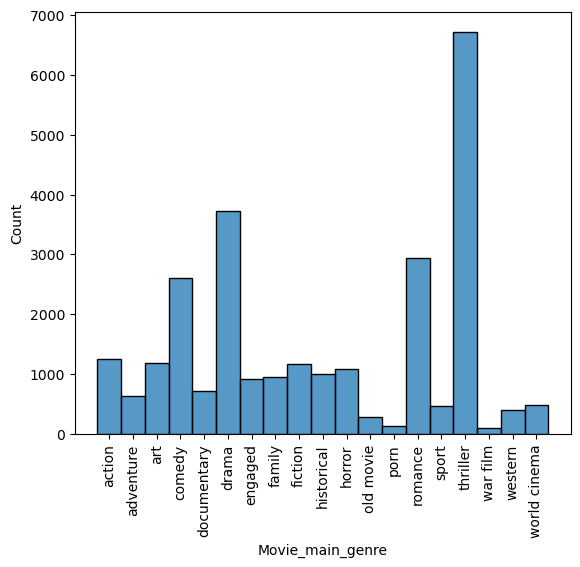

In [ ]:
movie_EF_main_genre['Movie_main_genre'] = movie_EF_main_genre.Movie_main_genre.astype('category')

ax = sns.histplot(movie_EF_main_genre,x='Movie_main_genre',stat='count')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.gcf().subplots_adjust(bottom=0)


# preprocess character metadata before to merge it with movies



In [ ]:
# Ajouter les noms des personnages principaux au movie.metadata
movie_English_only_copy = movie_English_only.copy(deep= True)
character_metadata_copy = character_metadata.copy(deep= True)

character_metadata_copy.dropna(subset=['Character_name'], inplace=True)
#il reste encore des NaN !!!!

movie_character = movie_English_only_copy.merge(character_metadata_copy, how='inner',left_on='Wikipedia_movie_ID', right_on='Wikipedia_movie_ID')

movie_character = movie_character[['Wikipedia_movie_ID', 'Movie_name', 'Movie_release_date_x',  'Movie_box_office_revenue', 'Movie_runtime', 'Movie_languages', 'Movie_countries', 'Movie_genres', 'Character_name', 'Freebase_character_ID']]
# je sais pas pourquoi mais il veut pas mettre le wikipedia movie ID et la release date

grouped_movie_character = movie_character.groupby('Wikipedia_movie_ID').agg({
    'Movie_name': 'first',  
    'Movie_box_office_revenue': 'first', 
    'Movie_runtime': 'first', 
    'Movie_languages': 'first', 
    'Movie_countries': 'first',  
    'Movie_genres': 'first',  
    'Character_name': lambda x: ', '.join(x.dropna()),  
    'Freebase_character_ID':  lambda x: ', '.join(x.dropna())
}).reset_index()
grouped_movie_character.sample(5).head()

,Wikipedia_movie_ID,Movie_name,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Character_name,Freebase_character_ID
8262,8406407,Beautiful People,NaN,117.0,[English Language],[United Kingdom],"[Black comedy, War film, Drama, Indie, Comedy]","Dr. Mouldy, Nora Thornton, Edward Thornton, Ge...","/m/0bp7rwk, /m/0bp7rts, /m/0bp7rsw, /m/0bp7rw6..."
13177,23242671,Betrayal,NaN,90.0,[English Language],[United States of America],"[Thriller, Gangster Film, Road movie, Action/A...","Emily Shaw, Det. Mark Winston","/m/0h1pz7h, /m/0h2pny_"
3178,1992647,Driving Lessons,NaN,98.0,[English Language],[United Kingdom],"[Comedy-drama, Coming of age, Drama, Comedy, I...","Ben Marshall, Laura Marshall, Peter, Sarah, Ro...","/m/0gy2111, /m/0gzt9d_, /m/0gzt9dr, /m/0gyfg8j..."
3754,2375811,Jason Goes To Hell: The Final Friday,15935068.0,89.0,[English Language],[United States of America],"[Cult, Horror, Slasher, Teen]",Diana Kimble,/m/0h342f5
2223,1275551,Cheech & Chong's Next Movie,41675194.0,95.0,[English Language],[United States of America],"[Cult, Comedy]","Cheech, Chong, Actress, Chick Hazard - Private...","/m/0h323d1, /m/0h2x98c, /m/0h15wk9, /m/0h284d8"


In [ ]:
# check if one of the character's name is present in the movie title

movie_character['Character_in_title'] = movie_character.apply(lambda row: str(row['Character_name']).lower() in str(row['Movie_name']).lower(), axis=1)
movie_with_character_in_title = movie_character['Character_in_title'].sum()

print(f"Fraction of movie titles containing character name: {movie_with_character_in_title / len(grouped_movie_character):.2%}")
print(movie_character.loc[movie_character['Character_in_title'] == 1, ['Movie_name', 'Character_name']])

Fraction of movie titles containing character name: 8.25%
                                    Movie_name   Character_name
26                                     Henry V          Henry V
35                                Mary Poppins     Mary Poppins
188                ChromeSkull: Laid to Rest 2      ChromeSkull
255                     Good Morning Miss Dove        Miss Dove
374                                  RoboCop 3          RoboCop
...                                        ...              ...
98329                             Stingray Sam     Stingray Sam
98662                                    Emile            Emile
98715                            Grandma's Boy    Grandma's Boy
99119  Sherlock Holmes and the Voice of Terror  Voice of Terror
99128  Sherlock Holmes and the Voice of Terror  Sherlock Holmes

[1305 rows x 2 columns]


In [ ]:
# certains noms de personnages ne sont aps vraiment des prénoms, est-ce qu'il faudra faire de la NLP?


Finding cofounders of success

In [89]:
#load the dataset with the list of famous actors (top 100 from IMDB) and the dataset with the movie ratings from imdb
famous_actors= pd.read_csv('Data/famous_actors.csv')
movies = pd.read_csv('Data/movies_metadata_english_only.csv')
ratings_imdb = pd.read_table('Data/ratings_imdb.tsv', sep="\t")
movies.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv..."
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,['English Language'],['United States of America'],"['Mystery', 'Biographical film', 'Drama', 'Cri..."
2,3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,['English Language'],['United Kingdom'],"['Thriller', 'Erotic thriller', 'Psychological..."
3,6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,['English Language'],['South Africa'],"['Family Film', 'Fantasy', 'Adventure', 'World..."
4,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']"


In [53]:
# import the file with the movies titles ID from imdb
import gdown
import pandas as pd

link_drive = "https://drive.google.com/file/d/1ZkAQhufH1q1a9aJDgs_AzR0hoo2p-LWQ/view?usp=share_link"
id_fichier = link_drive.split("/")[-2]
link_direct = f"https://drive.google.com/uc?id={id_fichier}"
name_file_local = "titles_imdb.tsv"
gdown.download(link_direct, name_file_local, quiet=False)
movie_imdb = pd.read_csv(name_file_local, sep='\t')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1ZkAQhufH1q1a9aJDgs_AzR0hoo2p-LWQ
From (redirected): https://drive.google.com/uc?id=1ZkAQhufH1q1a9aJDgs_AzR0hoo2p-LWQ&confirm=t&uuid=0331db07-da6c-4d4c-b473-68370b885c09
To: /Users/blanchekerorgant/Documents/GitHub/2023/2023/ada-2023-project-randada/titles_imdb.tsv
100%|██████████| 884M/884M [01:38<00:00, 9.00MB/s] 
/var/folders/tn/v_tw25wx0cxgctjg5n0dqd0w0000gn/T/ipykernel_58541/2245413820.py:9: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_imdb = pd.read_csv(name_file_local, sep='\t')


In [127]:
#clean the movie dataset from imdb

movie_imdb['startYear'] = movie_imdb['startYear'].replace('\\N', np.nan)
movie_imdb['runtimeMinutes'] = movie_imdb['runtimeMinutes'].replace('\\N', np.nan)

movie_imdb.dropna(subset=['startYear'], inplace =True)
movie_imdb.dropna(subset=['runtimeMinutes'], inplace =True)

movie_imdb['startYear']=movie_imdb['startYear'].astype('int')
movie_imdb['runtimeMinutes']=movie_imdb['runtimeMinutes'].astype(int).astype('int')



In [97]:
# merging imdb movies dataset and CMU movies dataset on Movie title, release date and runtime 

merged_movies = movies.merge(movie_imdb,left_on=['Movie_name', 'Movie_release_date', 'Movie_runtime'],right_on=['primaryTitle', 'startYear', 'runtimeMinutes'], how="inner")
print('Size of the new dataset : ', merged_movies.shape)
merged_movies.head()



/var/folders/tn/v_tw25wx0cxgctjg5n0dqd0w0000gn/T/ipykernel_58541/2223374777.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_movies = movies.merge(movie_imdb,left_on=['Movie_name', 'Movie_release_date', 'Movie_runtime'],right_on=['primaryTitle', 'startYear', 'runtimeMinutes'], how="inner")


Size of the new dataset :  (13600, 19)


,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",tt0228333,movie,Ghosts of Mars,Ghosts of Mars,0,2001,\N,98,"Action,Horror,Sci-Fi"
1,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",tt0029852,movie,Alexander's Ragtime Band,Alexander's Ragtime Band,0,1938,\N,106,"Drama,Music,Musical"
2,10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,['English Language'],['United States of America'],"['Drama', 'Black-and-white']",tt0021335,movie,Sarah and Son,Sarah and Son,0,1930,\N,86,"Drama,Romance"
3,13,171005,/m/016ywb,Henry V,1989,10161099.0,137.0,['English Language'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ...",tt0097499,movie,Henry V,Henry V,0,1989,\N,137,"Biography,Drama,History"
4,17,77856,/m/0kcn7,Mary Poppins,1964,102272727.0,139.0,['English Language'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C...",tt0058331,movie,Mary Poppins,Mary Poppins,0,1964,\N,139,"Comedy,Family,Fantasy"


In [119]:
#adding the ratings feature

movies_with_ratings= merged_movies.merge(ratings_imdb, left_on='tconst', right_on='tconst', how='inner')
print('Size of the dataset with the ratings : ', movies_with_ratings.shape)
movies_with_ratings.head()

Size of the dataset with the ratings :  (13276, 21)


,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",...,movie,Ghosts of Mars,Ghosts of Mars,0,2001,\N,98,"Action,Horror,Sci-Fi",4.9,56894
1,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",...,movie,Alexander's Ragtime Band,Alexander's Ragtime Band,0,1938,\N,106,"Drama,Music,Musical",6.8,2268
2,10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,['English Language'],['United States of America'],"['Drama', 'Black-and-white']",...,movie,Sarah and Son,Sarah and Son,0,1930,\N,86,"Drama,Romance",5.4,299
3,13,171005,/m/016ywb,Henry V,1989,10161099.0,137.0,['English Language'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ...",...,movie,Henry V,Henry V,0,1989,\N,137,"Biography,Drama,History",7.5,31193
4,17,77856,/m/0kcn7,Mary Poppins,1964,102272727.0,139.0,['English Language'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C...",...,movie,Mary Poppins,Mary Poppins,0,1964,\N,139,"Comedy,Family,Fantasy",7.8,181710


In [121]:
# create an indice for success, based on ratings and box office revenues
movies_with_ratings["success"]= (movies_with_ratings.averageRating + movies_with_ratings.Movie_box_office_revenue)/2

In [124]:
# famous actors influence on success

#merge movies and character metadata to haev access to actors information per movie
movies_and_actors= movie_metadata.merge(character,on='Wikipedia_movie_ID',how='inner')

#to be considered as famous, an actor has to be in the famous_actors dataset
movies_and_actors['IsFamousActor']=movies_and_actors['Actor_name'].isin(famous_actors['Name'])

famous=movies_and_actors.groupby('Wikipedia_movie_ID')['IsFamousActor'].apply(lambda x : any(x)).to_frame('IsFamousActor')

movies=movie_metadata.merge(famous,on='Wikipedia_movie_ID',how='left')
movies_with_ratings['IsFamousActor']=movies['IsFamousActor'].apply(lambda x : x if np.isnan(x) else int(x))



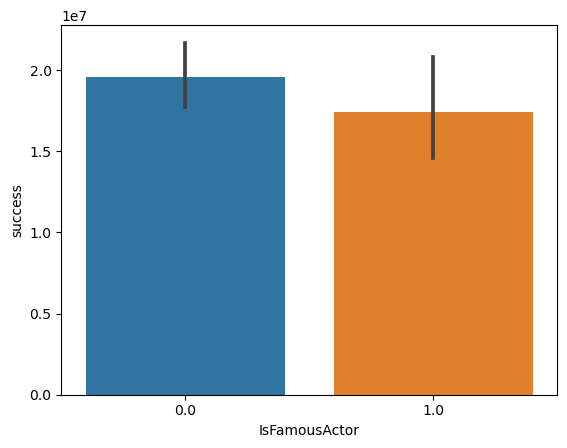

In [126]:
ax = sns.barplot(data=movies_with_ratings,x=movies_with_ratings['IsFamousActor'],y=movies_with_ratings['success'])

#est-ce qu'on garde que les films avec un revenue pour l'analyse du succès ? ça réduit beaucoup le dataframe non ? et est-ce qu'on ajuste avec l'inflation ?

In [109]:
# Load the inflation dataset of the consumer price indices between 1914 and 2023 from OECD
inflation = pd.read_csv('Data/inflation_cpi.csv')



(67, 19)